<a href="https://colab.research.google.com/github/agibayrashitnu/Deep-Learning/blob/main/CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Installation and Setup

In [8]:

pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [9]:
import tensorflow as tf

In [11]:
print(tf.__version__)

2.13.0


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Data Preprocessing

In [14]:
from tensorflow.keras.datasets import cifar10

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [17]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [23]:
class_names = ['0:airplane', '1: automobile','2:bird', '3:cat', '4:deer', '5:dog','6: frog', '7:horse', '8:ship','9:truck']

In [24]:
class_names

['0:airplane',
 '1: automobile',
 '2:bird',
 '3:cat',
 '4:deer',
 '5:dog',
 '6: frog',
 '7:horse',
 '8:ship',
 '9:truck']

In [25]:
x_train.max()

255

In [26]:
x_train.min()

0

In [27]:
x_train.mean()

120.70756512369792

In [31]:
y_train.max(), y_train.min(), y_train.mean()

(9, 0, 4.5)

In [32]:
#Normalizing the imagess
x_train = x_train/255
x_test = x_test/255

In [33]:
x_train.max(),x_train.min(),x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [34]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

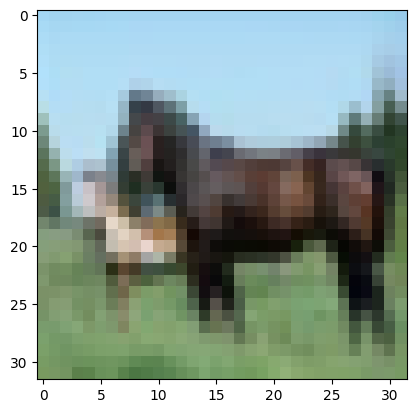

In [37]:
plt.imshow(x_train[12])

In [38]:
y_train[12]

array([7], dtype=uint8)

In [40]:
class_names
#so we can say that it is horse

['0:airplane',
 '1: automobile',
 '2:bird',
 '3:cat',
 '4:deer',
 '5:dog',
 '6: frog',
 '7:horse',
 '8:ship',
 '9:truck']

# Step 3: Building the CNN

In [41]:
# Defining the object
model  = tf.keras.models.Sequential()

In [43]:
# Adding first convolutional layer
#1)kernels(filters) = 32
#2) kernel_size = 3
#3) padding = same
#4) activation function = relu
#5) input shape = (32,32,3)

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu',input_shape=(32,32,3)))

In [44]:
# Adding second convolutional layer and maxpooling layer
#1)kernels(filters) = 32
#2) kernel_size = 3
#3) padding = same
#4) activation function = relu
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))

# Adding Max pooling layer
#1) Pool size = 2 ( window size where max or average pooling will be done)
#2) strides = 2 (by how many pixels filter is moving)
#3) Padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'valid'))

In [45]:
# Adding third CNN layer
#1)kernels(filters) = 64
#2) kernel_size = 3
#3) padding = same
#4) activation function = relu

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))

In [46]:
# Adding second convolutional layer and maxpooling layer
#1)kernels(filters) = 64
#2) kernel_size = 3
#3) padding = same
#4) activation function = relu
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))

# Adding Max pooling layer
#1) Pool size = 2 ( window size where max or average pooling will be done)
#2) strides = 2 (by how many pixels filter is moving)
#3) Padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'valid'))

In [47]:
# Adding droput layer ( known as regularization technique )
model.add(tf.keras.layers.Dropout(0.4))

In [49]:
# Adding a flattening layer ( by falttening we convert an array to a vector)
model.add(tf.keras.layers.Flatten())

In [50]:
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [52]:
# Adding second Dense layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [54]:
# Loss function will guide to optimizer ,
#so that optimizer will move towards right direction and can find global minimum
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'sparse_categorical_accuracy')

# Step 4: Training the Model


In [55]:
model.fit(x_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
5000/5000 [==============================] - 311s 62ms/step - loss: 1.4109 - sparse_categorical_accuracy: 0.4881
Epoch 2/10
5000/5000 [==============================] - 305s 61ms/step - loss: 1.0095 - sparse_categorical_accuracy: 0.6439
Epoch 3/10
5000/5000 [==============================] - 305s 61ms/step - loss: 0.8676 - sparse_categorical_accuracy: 0.6924
Epoch 4/10
5000/5000 [==============================] - 307s 61ms/step - loss: 0.7831 - sparse_categorical_accuracy: 0.7220
Epoch 5/10
5000/5000 [==============================] - 306s 61ms/step - loss: 0.7190 - sparse_categorical_accuracy: 0.7486
Epoch 6/10
5000/5000 [==============================] - 305s 61ms/step - loss: 0.6628 - sparse_categorical_accuracy: 0.7645
Epoch 7/10
5000/5000 [==============================] - 307s 61ms/step - loss: 0.6318 - sparse_categorical_accuracy: 0.7770
Epoch 8/10
5000/5000 [==============================] - 306s 61ms/step - loss: 0.5898 - sparse_categorical_accuracy: 0.7903
Epoch 9/

# Step 5:Model Evaluation and Prediction

In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 20s 63ms/step - loss: 0.7686 - sparse_categorical_accuracy: 0.7516


In [58]:
print(f'Test accuracy is: ',test_acc)

Test accuracy is:  0.7516000270843506


In [66]:
# Predictions
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 15s 48ms/step


In [68]:
print(y_pred[111])
print(y_test[111])

0
[0]


In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[795   4  30  17  31   2   3  15  89  14]
 [ 24 814   9   8   2   1   5   6  46  85]
 [ 67   3 636  47 114  34  42  38  16   3]
 [ 26   7  78 540  90 117  49  68  23   2]
 [ 10   1  37  47 775  14  31  73  10   2]
 [ 10   1  51 166  66 578  16  97  12   3]
 [  5   2  43  63  59  16 789  10  12   1]
 [ 10   1  24  24  53  24   4 853   6   1]
 [ 32  10   9   5   8   4   3   7 907  15]
 [ 28  44   4  16   7   7   0  23  42 829]]


In [70]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.7516
